
## Библиотека pandas

<img src="https://miptstats.github.io/images/m/pandas.gif" width="800"><br>


Pandas &mdash; пакет для статистической обработки данных, по функциональности близкий к SQL и R. Включает в себя функциональность работы с базами данных и таблицами Excel.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import warnings
warnings.simplefilter("ignore", FutureWarning)

### 1. Тип данных `Series`

Одномерный набор данных. Отсутствующий данные записываются как `np.nan`. Например, в этот день термометр сломался или метеоролог был пьян. При вычислении среднего и других операций соответствующие функции не учитывают отсутствующие значения.

In [2]:
l = [1, 3, 5, np.nan, 6, 8]
s = pd.Series(l)
s

,0
0,1.0
1,3.0
2,5.0
3,NaN
4,6.0
5,8.0


**Полезно знать:** Для поиска пропусков есть специальный метод `.isna()`. Он эквивалентен конструкции `s != s`

In [ ]:
s.isna()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

Основная информация о наборе данных: количество записей, среднее, стандартное отклонение, минимум, нижний квартиль, медиана, верхний квартиль, максимум, а так же тип данных.

In [ ]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

В данном примере обычная индексация как в Питоне.

In [ ]:
s[2]

5.0

In [ ]:
s[2] = 7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

Можно делать слайсы как в Питоне

In [ ]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [ ]:
s1 = s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
s2 = s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

В сумме `s1+s2` складываются данные **с одинаковыми индексами**. Поскольку в `s1` нет данного и индексом 0, а в `s2` &mdash; с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [ ]:
s1 + s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64

К наборам данных можно применять функции из `numpy`.

In [ ]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных `s` мы не указали, что будет играть роль индекса. По умолчанию это последовательность неотрицательных целых чисел 0, 1, 2, ...

In [ ]:
s.index

RangeIndex(start=0, stop=6, step=1)

Но можно создавать наборы данных с индексом, заданным списком.

In [3]:
i = list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [4]:
s = pd.Series(l, index=i)
s

,0
a,1.0
b,3.0
c,5.0
d,NaN
e,6.0
f,8.0


In [5]:
s['c']

5.0

Если индекс &mdash; строка, то вместо `s['c']` можно писать `s.c`.

In [6]:
s.c

5.0

При этом если в строке есть пробел, то такой способ не сработает

In [7]:
s['new string'] = 10.0

In [8]:
s.new string

SyntaxError: invalid syntax (<ipython-input-8-2cf79d7ae3f0>, line 1)

In [9]:
s['new string']

10.0

Набор данных можно создать из словаря.

In [10]:
s = pd.Series({'a':1, 'b':2, 'c':0})
s

,0
a,1
b,2
c,0


Можно отсортировать набор данных.

In [11]:
s.sort_values()

,0
c,0
a,1
b,2


Роль индекса может играть, скажем, последовательность дат или времён измерения и т.д..

In [12]:
d = pd.date_range('20160101', periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [13]:
s = pd.Series(sps.norm.rvs(size=10), index=d)
s

,0
2016-01-01,0.209442
2016-01-02,-0.022749
2016-01-03,1.174366
2016-01-04,-0.094966
2016-01-05,0.882967
2016-01-06,0.100662
2016-01-07,0.787042
2016-01-08,0.907982
2016-01-09,0.112471
2016-01-10,0.404736


Операции сравнения возвращают наборы булевых данных.

In [14]:
s > 0

,0
2016-01-01,True
2016-01-02,False
2016-01-03,True
2016-01-04,False
2016-01-05,True
2016-01-06,True
2016-01-07,True
2016-01-08,True
2016-01-09,True
2016-01-10,True


Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть `True`.

In [15]:
s[s > 0]

,0
2016-01-01,0.209442
2016-01-03,1.174366
2016-01-05,0.882967
2016-01-06,0.100662
2016-01-07,0.787042
2016-01-08,0.907982
2016-01-09,0.112471
2016-01-10,0.404736


Кумулятивные суммы. Первое значение кумулятивной суммы совпадает с первым значением исходного массива. Далее значение $k$-го элемента есть сумма элементов до $k$-го включительно.

In [16]:
s.cumsum()

,0
2016-01-01,0.209442
2016-01-02,0.186693
2016-01-03,1.361059
2016-01-04,1.266093
2016-01-05,2.149060
2016-01-06,2.249722
2016-01-07,3.036763
2016-01-08,3.944745
2016-01-09,4.057217
2016-01-10,4.461953


Наконец, построим график.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# Нужно для новых версий библиотек для преобразования дат
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

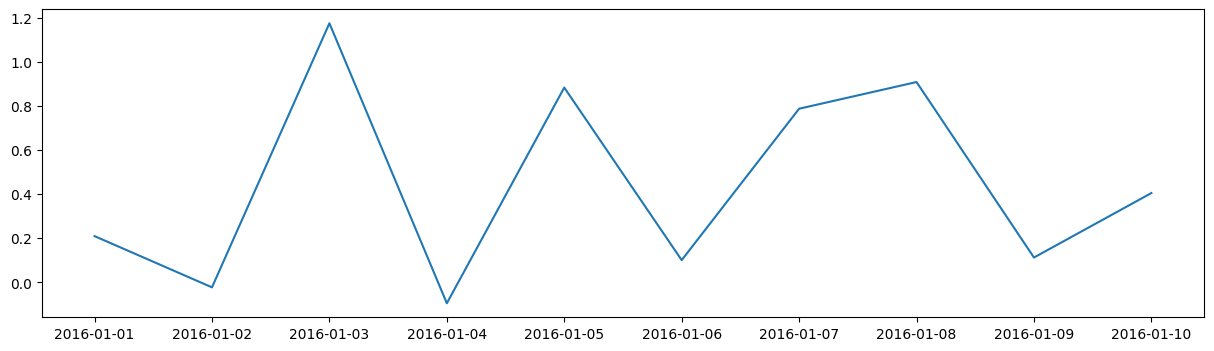

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(s)
plt.show()

Более подробно ознакомиться с методами можно [в официальной документации](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html).

### 2. Тип данных `DataFrame`

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [19]:
d = {'one': pd.Series(range(6), index=list('abcdef')),
     'two': pd.Series(range(7), index=list('abcdefg')),
     'three': pd.Series(sps.norm.rvs(size=7), index=list('abcdefg'))}
df = pd.DataFrame(d)
df

,one,two,three
a,0.0,0,-0.084356
b,1.0,1,0.253403
c,2.0,2,0.314466
d,3.0,3,1.038568
e,4.0,4,0.149394
f,5.0,5,0.357689
g,NaN,6,-0.290315


Таблица с несколькими разными типами данных

In [20]:
df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)),
                                    dtype='float32'),
                     'D': np.array([3] * 4,
                                   dtype='int32'),
                     'E': pd.Categorical(["test", "train",
                                          "test", "train"]),
                     'F': 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [21]:
df2.dtypes

,0
A,float64
B,datetime64[s]
C,float32
D,int32
E,category
F,object


#### 2.1 Данные

Вернемся к первой таблице и посмотрим на ее начало и конец

In [22]:
df.head()

,one,two,three
a,0.0,0,-0.084356
b,1.0,1,0.253403
c,2.0,2,0.314466
d,3.0,3,1.038568
e,4.0,4,0.149394


In [23]:
df.tail(3)

,one,two,three
e,4.0,4,0.149394
f,5.0,5,0.357689
g,NaN,6,-0.290315


Индексы

In [24]:
df.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

Названия колонок

In [25]:
df.columns

Index(['one', 'two', 'three'], dtype='object')

Получение обычной матрицы (из numpy) данных

In [26]:
df.values

array([[ 0.        ,  0.        , -0.08435593],
       [ 1.        ,  1.        ,  0.25340284],
       [ 2.        ,  2.        ,  0.31446624],
       [ 3.        ,  3.        ,  1.03856831],
       [ 4.        ,  4.        ,  0.1493944 ],
       [ 5.        ,  5.        ,  0.35768898],
       [        nan,  6.        , -0.29031454]])

Описательные статистики

In [27]:
df.describe()

,one,two,three
count,6.000000,7.000000,7.000000
mean,2.500000,3.000000,0.248407
std,1.870829,2.160247,0.418617
min,0.000000,0.000000,-0.290315
25%,1.250000,1.500000,0.032519
50%,2.500000,3.000000,0.253403
75%,3.750000,4.500000,0.336078
max,5.000000,6.000000,1.038568


Транспонирование данных - "перевернуть таблицу", сделав строки столбцами, а столбцы строками

In [28]:
df.T

,a,b,c,d,e,f,g
one,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,NaN
two,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
three,-0.084356,0.253403,0.314466,1.038568,0.149394,0.357689,-0.290315


Сортировка по столбцу

In [ ]:
df.sort_values(by='three', ascending=False)

,one,two,three
e,4.0,4,0.525983
f,5.0,5,0.316435
d,3.0,3,-0.047911
g,NaN,6,-0.253895
c,2.0,2,-0.372887
b,1.0,1,-0.406389
a,0.0,0,-0.542906


**Упражнение:** Сгенерируйте массив точек в 3D _каким угодно способом_, создайте по нему датафрейм и отсортируйте строки лексикографически.

In [ ]:
# ВАШ КОД


##### Решение

In [29]:
pd.DataFrame(
    sps.norm.rvs(size=(100, 3)),
    columns=['x', 'y', 'z']
).sort_values(by=['x', 'y', 'z'])

,x,y,z
68,-2.592357,0.643482,-0.745080
65,-1.968156,1.241947,0.335013
37,-1.944868,-2.054400,2.150413
25,-1.937645,-0.707806,0.898364
49,-1.839166,1.288462,-0.976140
...,...,...,...
38,1.376973,-0.918835,0.589483
64,1.945477,-0.886809,0.408655
2,2.067013,0.812678,0.859698
60,2.122234,1.295256,-0.093850


#### 2.2 Индексация

В отличии от обычной системы индексации в Python и Numpy, в Pandas принята иная система индексации, которая является несколько нелогичной, однако, на практике часто оказывается удобной при обработке сильно неоднородных данных.
Для написания продуктивного кода при обработке большого объема данных стоит использовать атрибуты `.at`, `.iat`, `.loc`, `.iloc`, `.ix`.

Если в качестве индекса указать имя столбца, получится одномерный набор данных типа `Series`.

In [ ]:
df['one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

К столбцу можно обращаться как к полю объекта, если имя столбца позволяет это сделать.

In [ ]:
df.one

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Индексы полученного одномерного набора данных.

In [ ]:
df['one'].index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

У данного столбца есть имя, его можно получить следующим образом.

In [ ]:
df['one'].name

'one'

Получение элемента массива

In [ ]:
df['one']['c']

2.0

Правила индексации в pandas несколько отличаются от общепринятых. Если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [ ]:
df['b':'d']

,one,two,three
b,1.0,1,-0.406389
c,2.0,2,-0.372887
d,3.0,3,-0.047911


Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным, хотя и удобно на практике.

In [ ]:
df[1:3]

,one,two,three
b,1.0,1,-0.406389
c,2.0,2,-0.372887


Логичнее работает атрибут `loc`: первая позиция &mdash; всегда индекс строки, а вторая &mdash; столбца.

In [ ]:
df.loc['b']

one      1.000000
two      1.000000
three   -0.406389
Name: b, dtype: float64

In [ ]:
df.loc['b', 'one']

1.0

In [ ]:
df.loc['a':'b', 'one']

a    0.0
b    1.0
Name: one, dtype: float64

In [ ]:
df.loc['a':'b', :]

,one,two,three
a,0.0,0,-0.542906
b,1.0,1,-0.406389


In [ ]:
df.loc[:, 'one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Атрибут `iloc` подобен `loc`: первый индекс &mdash; номер строки, второй &mdash; номер столбца. Это целые числа, конец диапазона не включается как обычно в питоне.

In [ ]:
df.iloc[2]

one      2.000000
two      2.000000
three   -0.372887
Name: c, dtype: float64

In [ ]:
df.iloc[1:3]

,one,two,three
b,1.0,1,-0.406389
c,2.0,2,-0.372887


In [ ]:
df.iloc[1:3, 0:2]

,one,two
b,1.0,1
c,2.0,2


Булевская индексация &mdash; выбор строк с заданным условием

In [ ]:
df[df.three > 0]

,one,two,three
e,4.0,4,0.525983
f,5.0,5,0.316435


**Упражнение**  
Сгенерируйте случайную целочисленную матрицу $n \times m$, где $n=20, m=10$. Создайте из неё датафрейм, пронумеровав столбцы случайной перестановкой чисел из $\{1, \ldots, m\}$. Выберите столбцы с чётными номерами и строки, в которых чётных элементов больше, чем нечётных.  

In [ ]:
# ВАШ КОД


##### Решение

In [ ]:
# создаем матрицу
n, m = 20, 10
data = sps.randint(low=-100, high=100).rvs(size=(n, m))
cols = np.arange(1, m + 1)
np.random.shuffle(cols)

# создаем таблицу
task_df = pd.DataFrame(data, columns=cols)

# задаем условия для строк и столбцов
col_mask = (cols % 2) == 0
row_mask = np.sum(data % 2, axis=1) < (m / 2)

# извлекаем данные по условию
task_df.loc[row_mask, col_mask]

#### 2.3 Изменение таблиц

К таблице можно добавлять новые столбцы.

In [ ]:
df['4th'] = df['one'] * df['two']
df['flag'] = df['two'] > 2
df

,one,two,three,4th,flag
a,0.0,0,-0.542906,0.0,False
b,1.0,1,-0.406389,1.0,False
c,2.0,2,-0.372887,4.0,False
d,3.0,3,-0.047911,9.0,True
e,4.0,4,0.525983,16.0,True
f,5.0,5,0.316435,25.0,True
g,NaN,6,-0.253895,NaN,True


И удалять имеющиеся.

In [ ]:
del df['two']
df['foo'] = 0
df

,one,three,4th,flag,foo
a,0.0,-0.542906,0.0,False,0
b,1.0,-0.406389,1.0,False,0
c,2.0,-0.372887,4.0,False,0
d,3.0,-0.047911,9.0,True,0
e,4.0,0.525983,16.0,True,0
f,5.0,0.316435,25.0,True,0
g,NaN,-0.253895,NaN,True,0


Изменение элемента

In [ ]:
df.iat[1, 0] = -1

# Эквивалентные формы:
# df['one']['b'] = -1  <--  SettingWithCopyWarning
# df.at['b', 'one'] = -1

df

,one,three,4th,flag,foo
a,0.0,-0.542906,0.0,False,0
b,-1.0,-0.406389,1.0,False,0
c,2.0,-0.372887,4.0,False,0
d,3.0,-0.047911,9.0,True,0
e,4.0,0.525983,16.0,True,0
f,5.0,0.316435,25.0,True,0
g,NaN,-0.253895,NaN,True,0


Добавим копию столбца `one`, в которую входят только строки до третьей.

In [ ]:
df['one_tr'] = df['one'][:3]
df

,one,three,4th,flag,foo,one_tr
a,0.0,-0.542906,0.0,False,0,0.0
b,-1.0,-0.406389,1.0,False,0,-1.0
c,2.0,-0.372887,4.0,False,0,2.0
d,3.0,-0.047911,9.0,True,0,NaN
e,4.0,0.525983,16.0,True,0,NaN
f,5.0,0.316435,25.0,True,0,NaN
g,NaN,-0.253895,NaN,True,0,NaN


#### 2.5 Пропуски

Удаление всех строк с пропусками

In [ ]:
df.dropna(how='any')

,one,three,4th,flag,foo,one_tr
a,0.0,-0.542906,0.0,False,0,0.0
b,-1.0,-0.406389,1.0,False,0,-1.0
c,2.0,-0.372887,4.0,False,0,2.0


Замена всех пропусков на значение

In [ ]:
df.fillna(value=666)

,one,three,4th,flag,foo,one_tr
a,0.0,-0.542906,0.0,False,0,0.0
b,-1.0,-0.406389,1.0,False,0,-1.0
c,2.0,-0.372887,4.0,False,0,2.0
d,3.0,-0.047911,9.0,True,0,666.0
e,4.0,0.525983,16.0,True,0,666.0
f,5.0,0.316435,25.0,True,0,666.0
g,666.0,-0.253895,666.0,True,0,666.0


Замена всех пропусков на среднее по столбцу

In [ ]:
df.fillna(value=df.mean())

,one,three,4th,flag,foo,one_tr
a,0.000000,-0.542906,0.000000,False,0,0.000000
b,-1.000000,-0.406389,1.000000,False,0,-1.000000
c,2.000000,-0.372887,4.000000,False,0,2.000000
d,3.000000,-0.047911,9.000000,True,0,0.333333
e,4.000000,0.525983,16.000000,True,0,0.333333
f,5.000000,0.316435,25.000000,True,0,0.333333
g,2.166667,-0.253895,9.166667,True,0,0.333333


Булевская маска пропущенных значений

In [ ]:
df.isnull()

,one,three,4th,flag,foo,one_tr
a,False,False,False,False,False,False
b,False,False,False,False,False,False
c,False,False,False,False,False,False
d,False,False,False,False,False,True
e,False,False,False,False,False,True
f,False,False,False,False,False,True
g,True,False,True,False,False,True


Просто удалить строки с пропущенными значения

In [30]:
df.dropna()

# чтобы обновить датасет нужно df = df.dropna() или df.dropna(inplace=True)

,one,two,three
a,0.0,0,-0.084356
b,1.0,1,0.253403
c,2.0,2,0.314466
d,3.0,3,1.038568
e,4.0,4,0.149394
f,5.0,5,0.357689


#### 2.5 Простые операции

Создадим таблицу из массива случайных чисел.

In [ ]:
df1 = pd.DataFrame(sps.uniform.rvs(size=(10, 4)),
                   columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
0,0.459822,0.156361,0.140080,0.582276
1,0.233602,0.540536,0.773553,0.237599
2,0.126075,0.212625,0.715625,0.522497
3,0.943916,0.921324,0.162516,0.691716
4,0.471539,0.149148,0.674082,0.179191
5,0.131999,0.722460,0.352341,0.178990
6,0.247497,0.596999,0.492316,0.573033
7,0.915275,0.240915,0.237264,0.180931
8,0.543690,0.128554,0.139226,0.018398
9,0.190750,0.225518,0.268433,0.345286


In [ ]:
df2 = pd.DataFrame(sps.uniform.rvs(size=(7, 3)),
                   columns=['A', 'B', 'C'])
df2

,A,B,C
0,0.785366,0.800206,0.358125
1,0.385376,0.969908,0.195000
2,0.638482,0.502140,0.956010
3,0.474895,0.293395,0.014651
4,0.328143,0.936700,0.771902
5,0.373467,0.140538,0.445425
6,0.218142,0.942851,0.136191


In [ ]:
df1 + df2

,A,B,C,D
0,1.245187,0.956567,0.498205,NaN
1,0.618978,1.510444,0.968553,NaN
2,0.764557,0.714765,1.671636,NaN
3,1.418812,1.214719,0.177167,NaN
4,0.799683,1.085848,1.445983,NaN
5,0.505466,0.862998,0.797766,NaN
6,0.465639,1.539850,0.628507,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [ ]:
2 * df1 + 3

,A,B,C,D
0,3.919643,3.312722,3.280159,4.164552
1,3.467203,4.081072,4.547107,3.475197
2,3.252149,3.425250,4.431251,4.044995
3,4.887833,4.842648,3.325032,4.383433
4,3.943078,3.298295,4.348163,3.358381
5,3.263998,4.444919,3.704681,3.357980
6,3.494993,4.193998,3.984631,4.146066
7,4.830549,3.481829,3.474527,3.361861
8,4.087380,3.257108,3.278451,3.036795
9,3.381501,3.451037,3.536866,3.690573


Построим графики кумулятивных сумм

In [ ]:
cs = df1.cumsum()
cs

,A,B,C,D
0,0.459822,0.156361,0.140080,0.582276
1,0.693423,0.696897,0.913633,0.819874
2,0.819498,0.909522,1.629258,1.342372
3,1.763414,1.830846,1.791774,2.034088
4,2.234954,1.979994,2.465856,2.213279
5,2.366953,2.702453,2.818196,2.392269
6,2.614449,3.299452,3.310512,2.965302
7,3.529724,3.540367,3.547775,3.146232
8,4.073414,3.668921,3.687001,3.164630
9,4.264164,3.894439,3.955434,3.509916


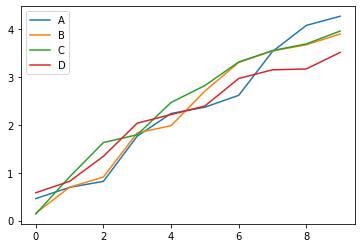

In [ ]:
cs.plot()
plt.show()

### 3. Чтение и запись данных

**Загрузка текстовых файлов табличного вида** производится с помощью функции `pd.read_csv`. Основные аргументы следующие:
* `filepath_or_buffer` &mdash; пусть к файлу;
* `sep` &mdash; разделитель колонок в строке (запятая, табуляция и т.д.);
* `header` &mdash; номер строки или список номеров строк, используемых в качестве имен колонок;
* `names` &mdash; список имен, которые будут использованы в качестве имен колонок;
* `index_col` &mdash; колонка, используемая в качестве индекса;
* `usecols` &mdash; список имен колонок, которые будут загружены;
* `nrows` &mdash; сколько строк прочитать;
* `skiprows` &mdash; номера строк с начала, которые нужно пропустить;
* `skipfooter` &mdash; сколько строк в конце пропустить;
* `na_values` &mdash; список значений, которые распознавать как пропуски;
* `parse_dates` &mdash; распознавать ли даты, можно передать номера строк;
* `date_parser` &mdash; парсер дат;
* `dayfirst` &mdash; день записывается перед месяцем или после;
* `thousands` &mdash; разделитель тысяч;
* `decimal` &mdash; разделитель целой и дробной частей;
* `comment` &mdash; символ начала комментария.

**Запись таблицы в текстовый файл** производится с помощью функции `df.to_csv`. Основные аргументы следующие:
* `df` &mdash; DataFrame, который нужно записать;
* `path_or_buf` &mdash; путь, куда записать;
* `sep` &mdash; разделитель колонок в строке (запятая, табуляция и т.д.);
* `na_rep` &mdash; как записать пропуски;
* `float_format` &mdash; формат записи дробных чисел;
* `columns` &mdash; какие колонки записать;
* `header` &mdash; как назвать колонки при записи;
* `index` &mdash; записывать ли индексы в файл;
* `index_label` &mdash; имена индексов, которые записать в файл.

### 4. Примеры чтения данных и работы с датами

Прочитаем файл, который содержит два столбца &mdash; дата и число. Столбцы разделяются табуляцией.

In [ ]:
df = pd.read_csv('./example.csv', sep='\t', parse_dates=[0])
df.head()

,Time,Value
0,2019-01-09,66
1,2019-02-09,34
2,2019-03-09,18
3,2019-04-09,32
4,2019-05-09,84


В информации о таблице видим, что дата определилась, т.к. формат колонки `Time` обозначен как `datetime64[ns]`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Time     18 non-null datetime64[ns]
Value    18 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 416.0 bytes


Но при печати понимаем, что часть дат распозналась неправильно. Если число месяца меньше 13, то pandas путает день и месяц. В одном и том же столбце. Кошмар...

In [ ]:
df['Time']

0    2019-01-09
1    2019-02-09
2    2019-03-09
3    2019-04-09
4    2019-05-09
5    2019-06-09
6    2019-07-09
7    2019-08-09
8    2019-09-09
9    2019-10-09
10   2019-11-09
11   2019-12-09
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Укажем, что день всегда следует первым. Теперь все правильно

In [ ]:
df = pd.read_csv('./example.csv', sep='\t', parse_dates=[0],
                 dayfirst=True)
df['Time']

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-04
4    2019-09-05
5    2019-09-06
6    2019-09-07
7    2019-09-08
8    2019-09-09
9    2019-09-10
10   2019-09-11
11   2019-09-12
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Панды довольно ленивые, и если не попросить pandas распознать дату, то ничего делать не будет &mdash; оставит ее как `object`.

In [ ]:
df = pd.read_csv('./example.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
Time     18 non-null object
Value    18 non-null int64
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


Тогда можно воспользоваться функцией `pd.to_datetime`

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], dayfirst=True)
df['Time']

0    2019-09-01
1    2019-09-02
2    2019-09-03
3    2019-09-04
4    2019-09-05
5    2019-09-06
6    2019-09-07
7    2019-09-08
8    2019-09-09
9    2019-09-10
10   2019-09-11
11   2019-09-12
12   2019-09-13
13   2019-09-14
14   2019-09-15
15   2019-09-16
16   2019-09-17
17   2019-09-18
Name: Time, dtype: datetime64[ns]

Установим дату как индекс, получив временной ряд.

In [ ]:
df = df.set_index('Time')
df

,Value
Time,
2019-09-01,66
2019-09-02,34
2019-09-03,18
2019-09-04,32
2019-09-05,84
2019-09-06,27
2019-09-07,45
2019-09-08,84
2019-09-09,42


Его можно нарисовать

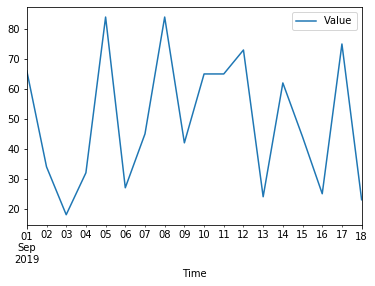

In [ ]:
df.plot();

Усреднение данных по трем дням

In [ ]:
df.resample('3D').mean()

,Value
Time,
2019-09-01,39.333333
2019-09-04,47.666667
2019-09-07,57.000000
2019-09-10,67.666667
2019-09-13,43.333333
2019-09-16,41.000000
